## Importing libraries

In [11]:
import numpy as np
import pandas as pd
import os
import keras 
from keras.models import Sequential
from keras import layers
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

## One Hot Encoding the Target Classes

In [12]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) # with and without tumor respectively

OneHotEncoder()

In [13]:
# This cell updates result list for images with tumor

data = [] # storing images in numpy array format
paths = [] # paths for individual images
result = [] # answers

for r, d, f in os.walk(r'./yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [14]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"./no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [15]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [16]:
result = np.array(result)
result = result.reshape(139,2)

## Splitting the Data into Training & Testing

In [17]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

## Model Building

In [53]:
model = Sequential()

model.add(layers.Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(layers.Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(layers.Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adam', metrics=['acc'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization_6 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 64, 64, 64)       

In [54]:
y_train.shape

(111, 2)

In [55]:
history = model.fit(x_train, y_train, epochs = 100, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/100
3/3 [==============================] - 1s 165ms/step - loss: 69.2778 - acc: 0.5405 - val_loss: 72.0125 - val_acc: 0.5357
Epoch 2/100
3/3 [==============================] - 0s 105ms/step - loss: 19.7948 - acc: 0.6036 - val_loss: 6.7277 - val_acc: 0.7857
Epoch 3/100
3/3 [==============================] - 0s 101ms/step - loss: 4.6159 - acc: 0.7027 - val_loss: 14.3242 - val_acc: 0.6071
Epoch 4/100
3/3 [==============================] - 0s 99ms/step - loss: 2.1659 - acc: 0.7838 - val_loss: 3.8870 - val_acc: 0.7500
Epoch 5/100
3/3 [==============================] - 0s 99ms/step - loss: 1.9860 - acc: 0.8198 - val_loss: 3.7891 - val_acc: 0.7500
Epoch 6/100
3/3 [==============================] - 0s 100ms/step - loss: 1.2448 - acc: 0.8919 - val_loss: 6.2079 - val_acc: 0.7500
Epoch 7/100
3/3 [==============================] - 0s 101ms/step - loss: 1.1529 - acc: 0.8468 - val_loss: 3.4934 - val_acc: 0.8214
Epoch 8/100
3/3 [==============================] - 0s 100ms/step - loss: 0.3269 -

# Plotting Losses

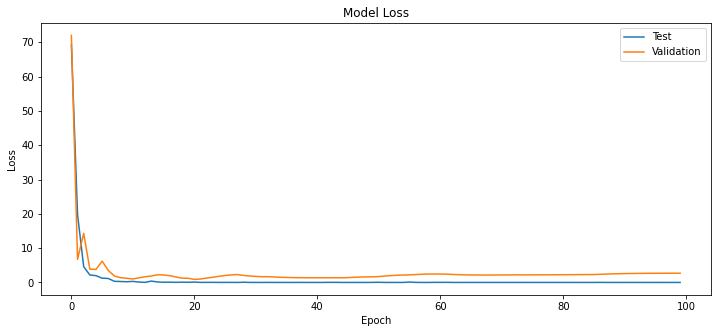

In [56]:
plt.figure(figsize = (12, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

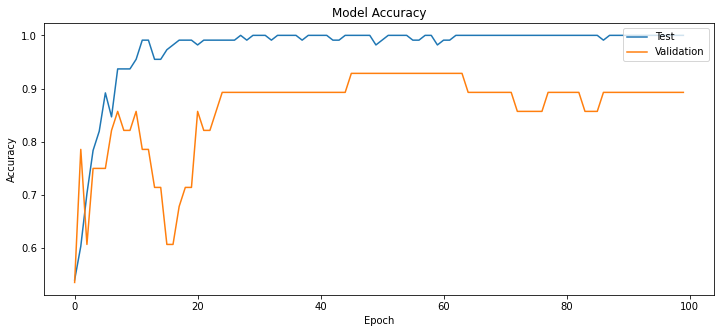

In [57]:
plt.figure(figsize = (12, 5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [58]:
def names(number): # Return names
    if number==0:
        return 'Tumor'
    else:
        return 'Not a tumor'

100.0% Confidence This Is Not a tumor


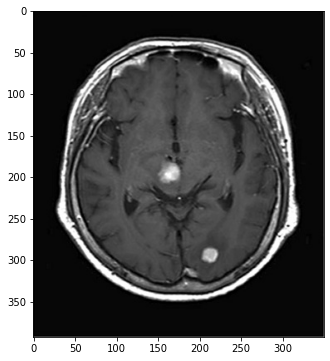

In [59]:
from matplotlib.pyplot import imshow
plt.figure(figsize=(6,6))
img = Image.open(r"./no/N17.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

100.0% Confidence This Is A Tumor


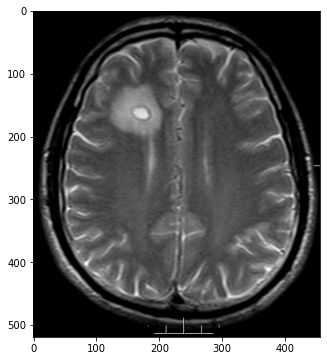

In [60]:
from matplotlib.pyplot import imshow
plt.figure(figsize=(6,6))
img = Image.open(r"./yes/Y3.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

## Creating an interface

In [61]:
import anvil.server
anvil.server.connect("H4CFYB62EVITOB6IUILJT3UG-XBSFUZ4XPAHLTLEK")

In [62]:
# creaing callable function
import anvil.media
@anvil.server.callable
def classify_image(file):
  with anvil.media.TempFile(file) as filename:
    img = Image.open(filename)
    x = np.array(img.resize((128,128)))
    x = x.reshape(1,128,128,3)
    res = model.predict_on_batch(x)
    classification = np.where(res == np.amax(res))[1][0]
    return(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))